In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [129]:
wine_df = pd.read_csv('winemag-data-130k-v2.csv')

In [130]:
wine_df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [131]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [132]:
# Remove columns that won't be used
# Start with finding best wines under $20

wine_df.drop(wine_df.columns[[8,9,10]], axis = 1, inplace = True)


In [133]:
# Checking for null values
wine_df['country'].isnull().sum() #63 null
#wine_df['price'].isnull().sum()  #8996 null
#wine_df['points'].isnull().sum() #0 null
#wine_df['variety'].isnull().sum() #1 null

63

In [134]:
# Since price is what were are looking at , going to remove all rows where price is NaN
wine_df.dropna(subset=['price'], inplace=True)
wine_df['price'].isnull().sum() 

0

In [135]:
# Fill missing values in country column with "unknown"
wine_df['country'] = wine_df['country'].fillna('unknown')


In [136]:
wine_df['country'].isnull().sum()

0

In [137]:
wine_df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,title,variety,winery
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem


In [138]:
cheap_wine = wine_df[wine_df['price'] < 20.0] #removing all wine that costs $20 and above


In [139]:
cheap_wine.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,title,variety,winery
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo


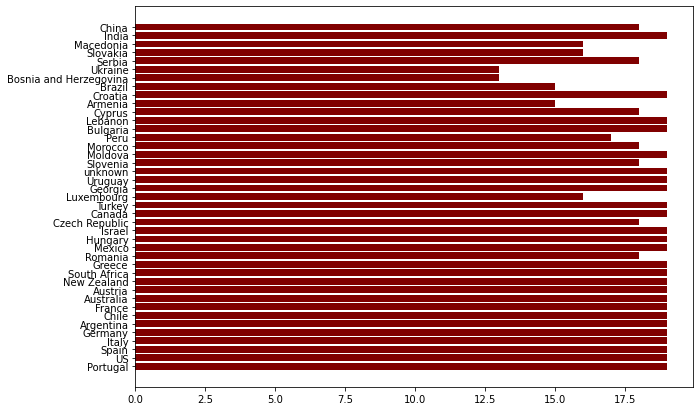

In [140]:
#TEST DO NOT USE

#fig, ax = plt.subplots(figsize=(10,7))

#ax.barh(cheap_wine['country'], cheap_wine['price'], color='maroon', align = 'center')
#plt.yticks(rotation=45)

#ax.tick_params(axis='x', which='major')
#plt.tight_layout()
#ax.yaxis.set_ticks_position('none')
#ax.yaxis.set_tick_params(pad=10)
#plt.show()

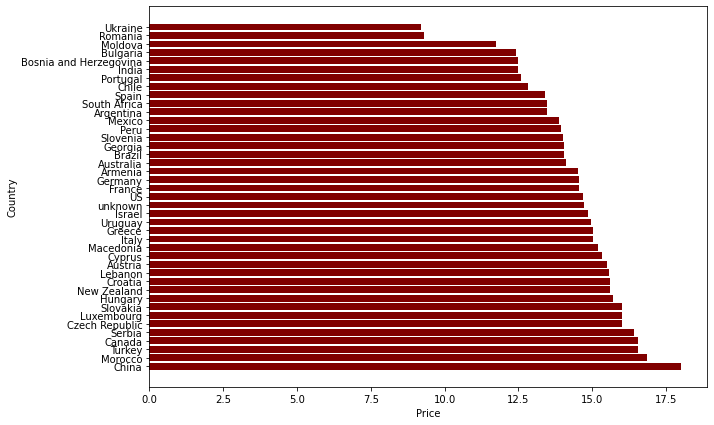

In [151]:
avg_country = cheap_wine.groupby(['country'])[ 'price'].mean().reset_index().sort_values(['price'], ascending=False,)#.plot(kind='barh')
#print(avg_country)
fig, ax = plt.subplots(figsize=(10,7))

ax.barh(avg_country['country'], avg_country['price'], color='maroon', align = 'center')
ax.set_xlabel('Price')
ax.set_ylabel('Country')
plt.show()
